# Interactive Mandlebrot using x86-64
Examples from http://nbviewer.jupyter.org/gist/harrism/f5707335f40af9463c43

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i
    return max_iters

In [3]:
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height, width = image.shape
    
    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

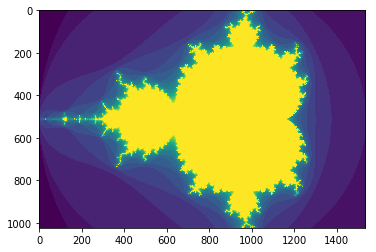

CPU times: user 5.19 s, sys: 13.5 ms, total: 5.2 s
Wall time: 5.2 s


In [4]:
%%time

image = np.empty((1024, 1536), dtype = np.uint8)
create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20) 

plt.imshow(image)
plt.show()